In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_dir = '/content/drive/MyDrive/AI_Pics/Leaf Dataset'

In [ ]:
batch_size = 32
img_height = 200
img_width = 300
epochs = 20

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 300 files belonging to 6 classes.
Using 270 files for training.
Found 300 files belonging to 6 classes.
Using 30 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['Basil', 'Chinar', 'Guava', 'Jamun', 'Lemon', 'Mango']

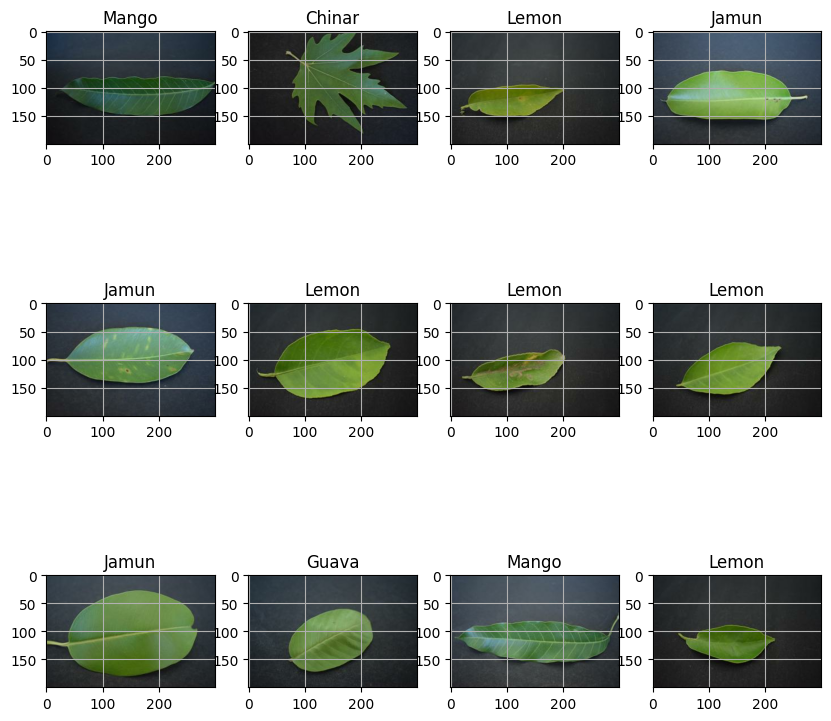

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [ ]:
model = Sequential([
Rescaling(1./255, input_shape=(img_height, img_width, 3)),
Conv2D(30, 3, activation='relu'),
MaxPooling2D(),
Conv2D(30, 3, activation='relu'),
MaxPooling2D(),
Conv2D(20, 3, activation='relu'),
MaxPooling2D(),
# Dropout(0.2),
Flatten(),
Dense(64, activation='relu'),
Dense(128, activation='relu'),
Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 200, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 198, 298, 30)        │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 149, 30)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 97, 147, 30)         │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 73, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 46, 71, 20)          │           5,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 35, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       1,030,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,053,948 (4.02 MB)

 Trainable params: 1,053,948 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = epochs
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.1693 - loss: 1.7774 - val_accuracy: 0.1667 - val_loss: 1.7195
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.3459 - loss: 1.5953 - val_accuracy: 0.5000 - val_loss: 1.3201
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5349 - loss: 1.2483 - val_accuracy: 0.3000 - val_loss: 1.4276
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6052 - loss: 0.9375 - val_accuracy: 0.6333 - val_loss: 0.8355
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7945 - loss: 0.6214 - val_accuracy: 0.8000 - val_loss: 0.4980
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8550 - loss: 0.3936 - val_accuracy: 0.7667 - val_loss: 0.4689
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8976 - loss: 0.3455 - val_accuracy: 0.8000 - val_loss: 0.3959
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9180 - loss: 0.2423 - val_accuracy: 0.8667 - val_loss: 0.3714
Epoch 9/

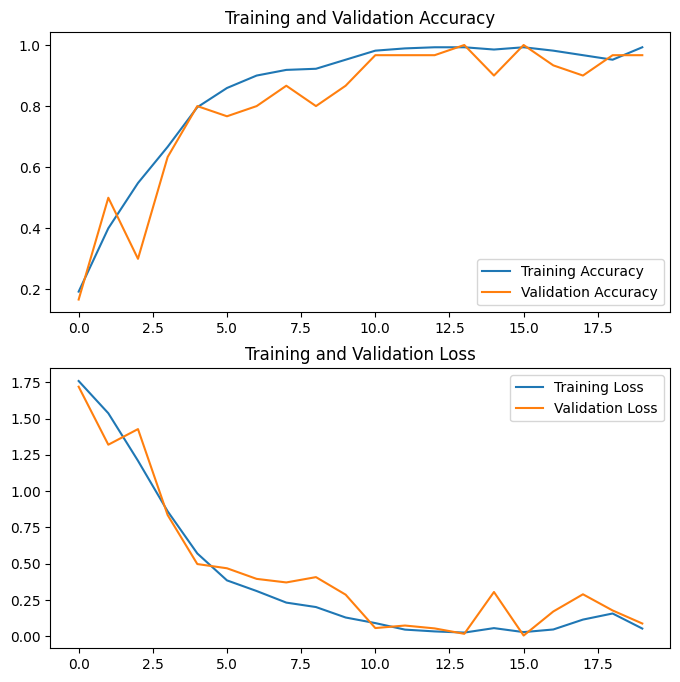

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Display the maximum validation accuracy
print(f"Maximum Validation Accuracy: {max(val_acc)*100:.2f}%")

Maximum Validation Accuracy: 100.00%


In [ ]:
# Display the maximum validation loss
print(f"Maximum Validation Loss: {min(val_loss)*100:.2f}%")

Maximum Validation Loss: 0.55%


In [ ]:
test_loss, test_acc = model.evaluate(train_ds)
print(f'Test Loss: {test_loss * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 983ms/step - accuracy: 0.9908 - loss: 0.0486
Test Loss: 3.08%
Test Accuracy: 99.63%


In [ ]:
print(model.evaluate(val_ds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 0.9667 - loss: 0.0885
[0.0885315090417862, 0.9666666388511658]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


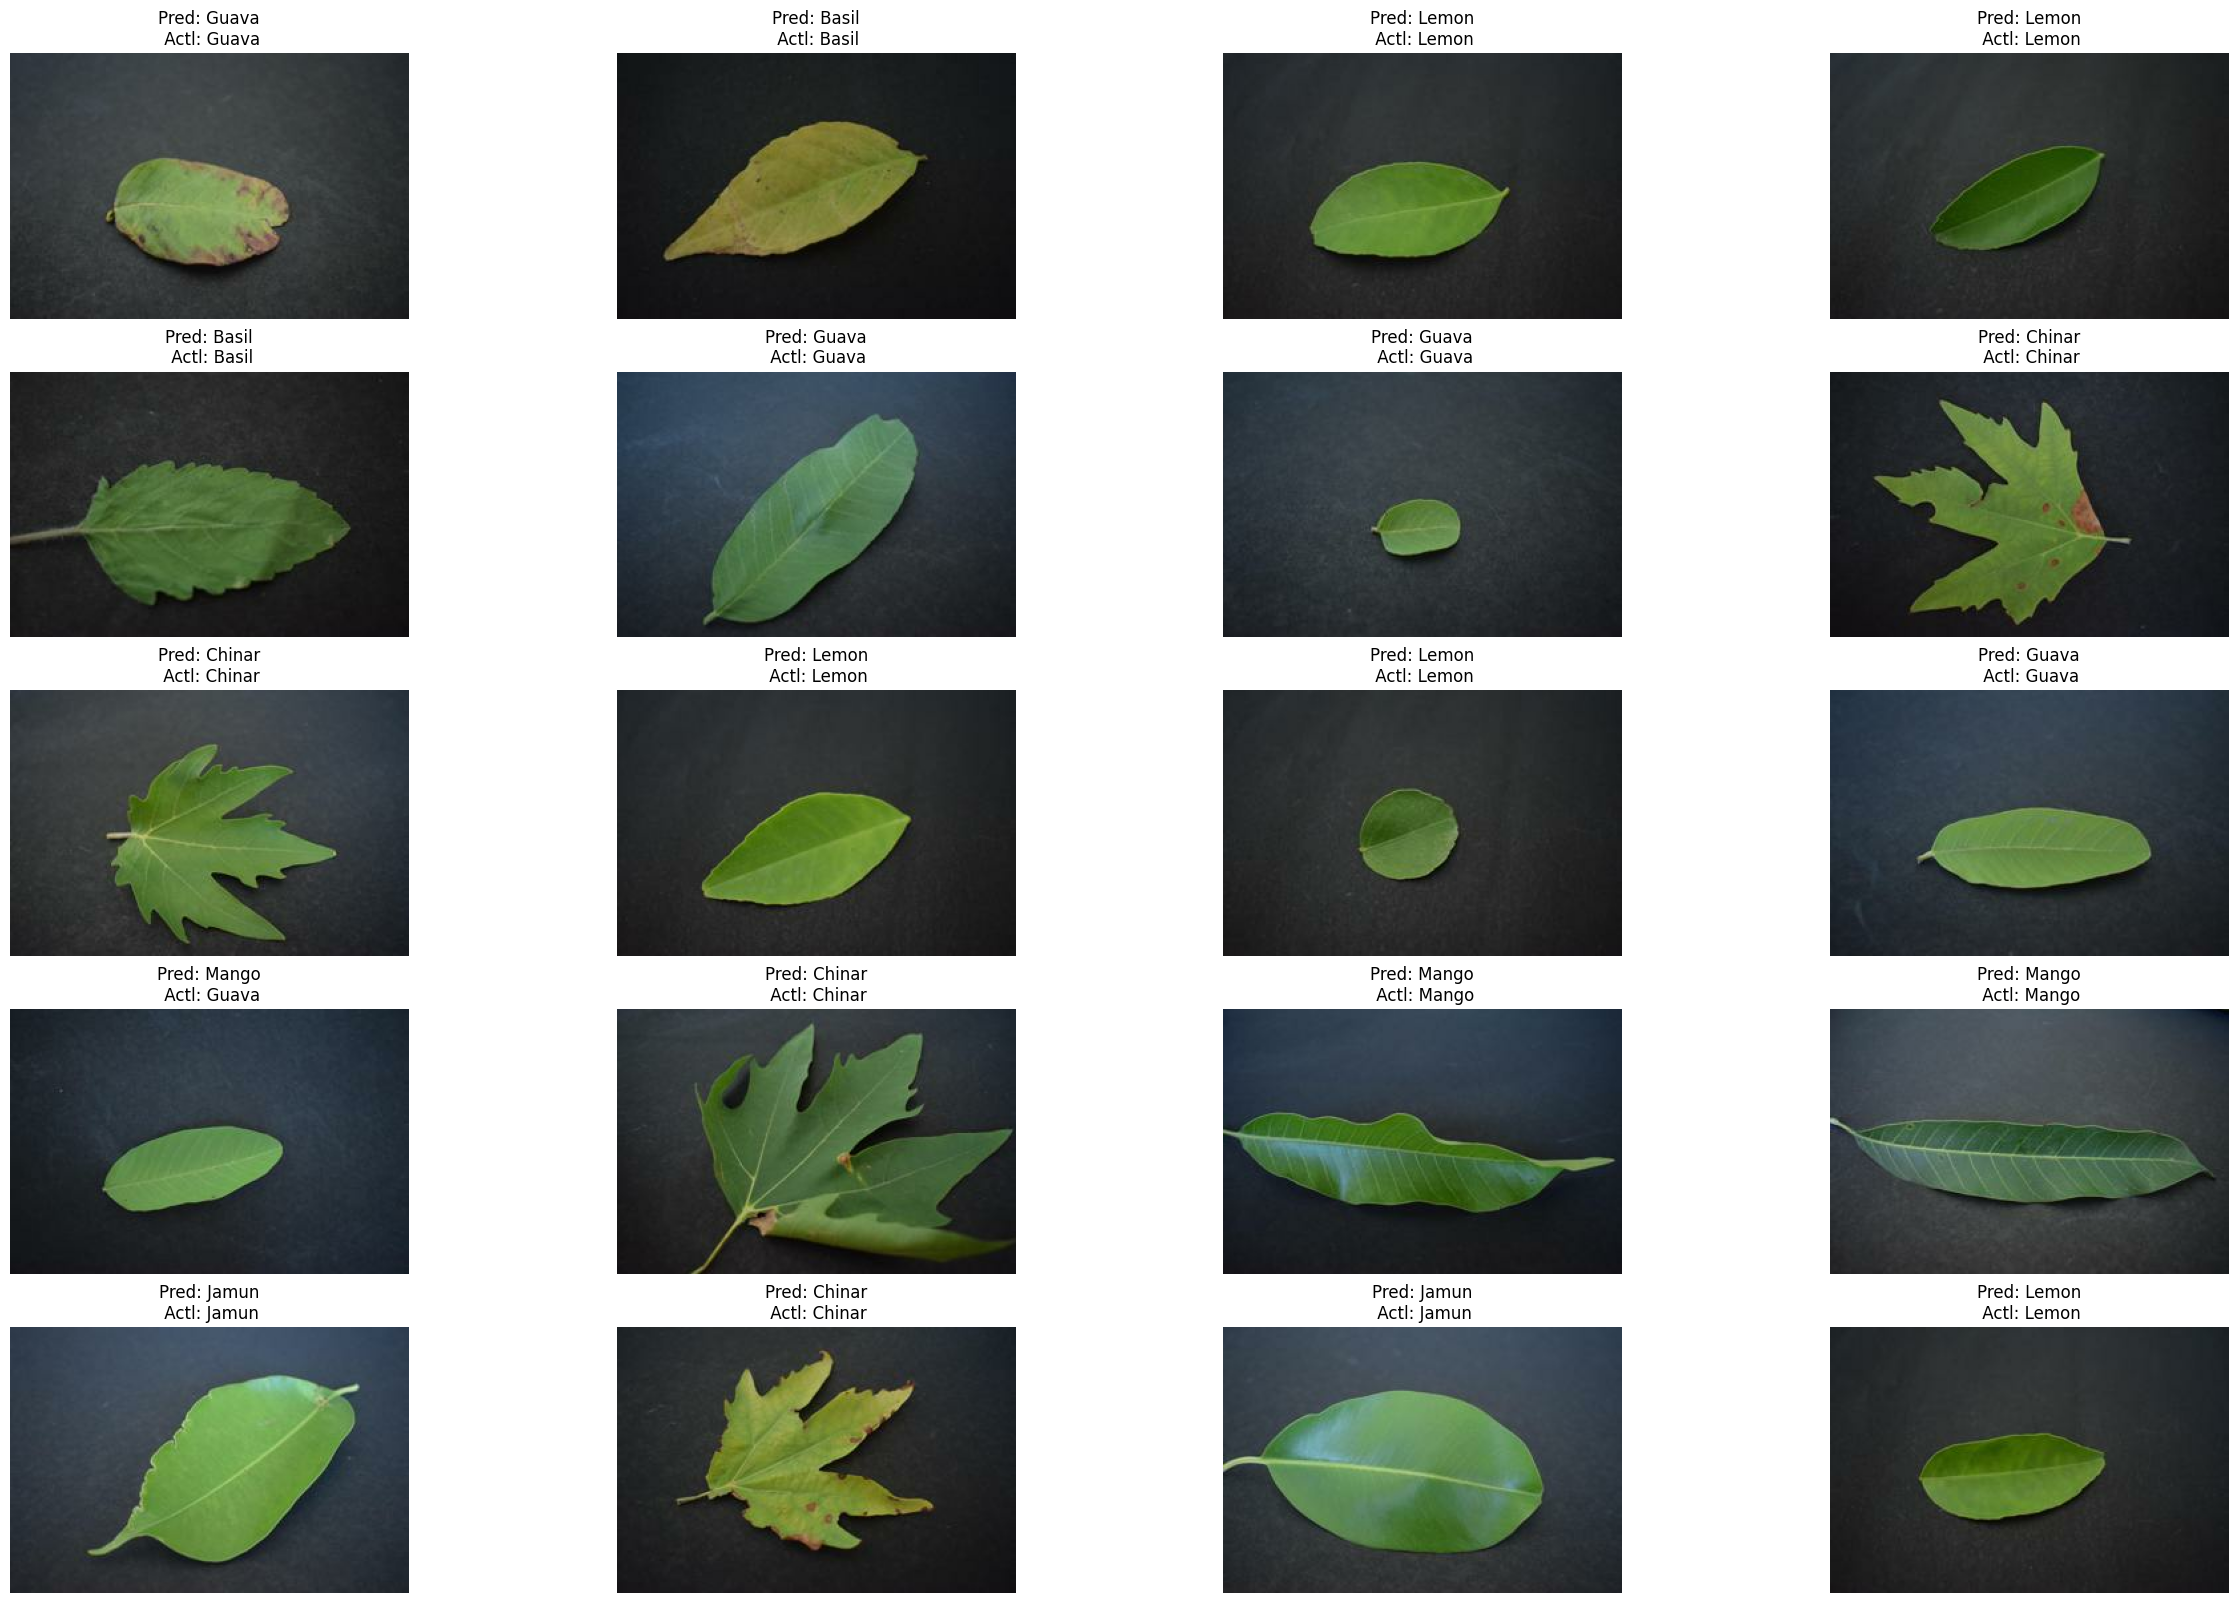

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i] + '\n Actl: '+ class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)

In [ ]:
model.save('plantclassificationmodel.h5',include_optimizer=True)

In [ ]:
from google.colab import files
files.download("plantclassificationmodel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>